# PCA
This task requires you to implement Principal Component Analysis and perform dimensionality reduction on a given dataset(s).

Perform dimensionality reduction on the given dataset, varying the number of principle components. The input are RGB images of size 32x32x3. 

Plot the the relationship between the cumulative explained variance and the number of principal components. The x-axis of the plot typically
represents the number of principal components, and the y-axis represents the cumulative explained variance.

ChatGPT Usage: The code was written using comments and Github Copilot since this is pretty standard flow.

### Importing the dataset

In [110]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
import pandas as pd
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

In [111]:
opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}


In [112]:

def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [113]:
dirpath = 'SMAI-Dataset-release/IIIT-CFW/'
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


In [114]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

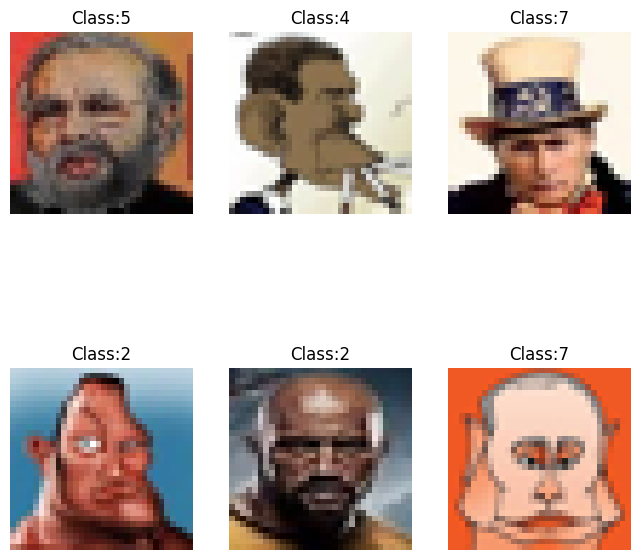

In [115]:
ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

### Perform PCA on the dataset

In [116]:
#perform pca on the data
X = X.reshape(N,H*W*C)
X = X.T
print("X shape:",X.shape)

#mean centering
X_mean = np.mean(X,axis=1)
X_mean = X_mean.reshape(X_mean.shape[0],1)
X = X - X_mean
print("X shape after mean centering:",X.shape)

#covariance matrix
cov_mat = np.cov(X, rowvar= True)
print("Covariance matrix shape:",cov_mat.shape)

#eigen values and eigen vectors
eig_vals,eig_vecs = np.linalg.eig(cov_mat)

#sort eigen values in descending order
sorted_index = np.argsort(eig_vals)[::-1]

#sort eigen vectors according to eigen values
eig_vecs = eig_vecs[:,sorted_index]

X shape: (3072, 672)
X shape after mean centering: (3072, 672)
Covariance matrix shape: (3072, 3072)


/home/anika/miniconda3/envs/ML/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


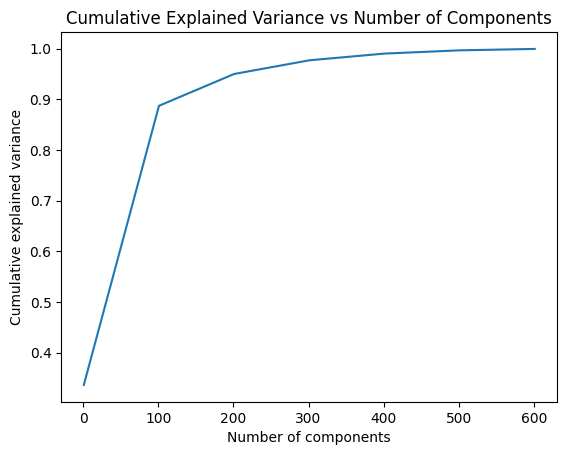

In [117]:
'''Vary the number of principal components and plot the the relationship between the cumulative explained variance and the number of principal components. The x-axis of the plot typically
represents the number of principal components, and the y-axis represents the cumulative explained variance.'''

cumulative_explained_variance = []
no_of_principal_components = []

# Limit the range of num_components to the maximum possible value
max_num_components = min(X.shape[0], X.shape[1])

for num_components in range(1,max_num_components, 100):
    # print("Number of principal components:",i)
    
    #select top i eigen vectors
    eig_vecs = eig_vecs[:,:num_components]
    
    #explained variance
    total = np.sum(eig_vals)
    explained_variance = []
    for i in range(len(eig_vals)):
        explained_variance.append(eig_vals[i]/total)

    #cumulative explained variance for num_components principal components
    cumulative_explained_variance.append(np.sum(explained_variance[:num_components]))
    
    no_of_principal_components.append(num_components)

#plot
plt.plot(no_of_principal_components,cumulative_explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance vs Number of Components')
plt.show()


Text(0.5, 1.0, 'Cumulative Explained Variance vs Number of Components')

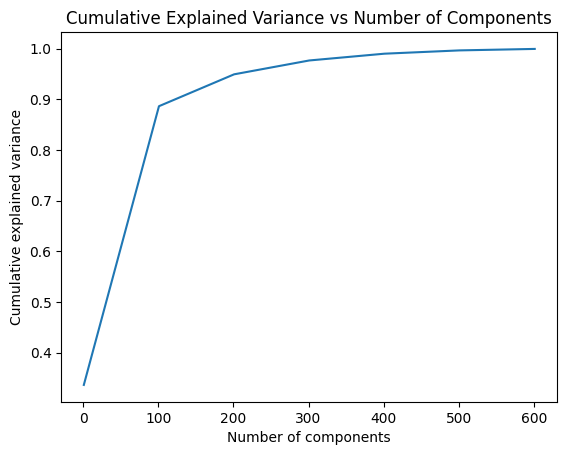

In [118]:
# Verify the nature of the graph using scikit learn
from sklearn.decomposition import PCA

cumulative_explained_variance = []
no_of_principal_components = []

# Limit the range of num_components to the maximum possible value
max_num_components = min(X.shape[0], X.shape[1])

for num_components in range(1,max_num_components, 100):
    pca = PCA(n_components=num_components)
    pca.fit(X.T)
    cumulative_explained_variance.append(np.sum(pca.explained_variance_ratio_))
    no_of_principal_components.append(num_components)

#plot
plt.plot(no_of_principal_components,cumulative_explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Explained Variance vs Number of Components')


### Uisng Pictionary Dataset

Perform the dimensionality reduction on features that you have used for assignment 1 (pictionary dataset) and show the metrics you have shown for the assignment 1. Compare the results and write down the observations in the MARKDOWN.

Observe the impact of dimensionality reduction on the dataset. Use a classifier on the dataset pre and post-dimensionality reduction (if the number of features of the dataset is n, perform dimensionality reduction varying the principal components from 1 to n) and note the accuracies of the classifier. You are free to use external libraries for the classifier.

In [119]:
# load data.npy into pandas dataframe
def load_data_from_A1():
    data = np.load('data.npy', allow_pickle=True)
    data = pd.DataFrame(data, columns=['game_id', 'resnet_embed', 'vit_embed','ground_truth','guess_time'])
    return data

In [120]:
database=load_data_from_A1()
display(database.head())

,game_id,resnet_embed,vit_embed,ground_truth,guess_time
0,9f894201-9d0d-4f75-853b-595c0c1bd661,"[[-0.001002429, 0.047839083, -0.0046581626, 0....","[[0.31094703, 0.20213455, -0.16519593, -0.0530...",sleep,33.144312
1,d2b4d879-0345-4df1-a978-eb7f9e8b89f1,"[[-0.013190677, 0.08283211, 0.006474074, 0.001...","[[-0.07832227, -0.07557866, -0.05214904, -0.32...",oven,98.512848
2,aaf0c209-f3a7-4c91-9a09-bc1e30400c4c,"[[-0.010499587, 0.047467805, -0.019303396, -0....","[[0.31455985, -0.024428558, 0.33139282, 0.2197...",chair,15.449425
3,5ae313c7-9934-456c-9685-36ef20b712fd,"[[-0.023966337, 0.024375185, -0.0009961016, -0...","[[0.113364324, -0.23683439, 0.34781978, -0.427...",igloo,43.358541
4,b58bbb2c-461f-4805-856e-cba323f97e8c,"[[-0.018555297, 0.050565578, -0.008821793, 0.0...","[[0.22332864, -0.28626534, -0.037617087, -0.17...",fish,14.454734


In [121]:
# get vit_embed and ground_truth columns
vit_embed = database['vit_embed']
ground_truth = database['ground_truth']

# convert vit_embed to numpy array
vit_embed = np.array(vit_embed.tolist())

# convert vit_embed shape from (1500,1,512) to (1500,512)
vit_embed = vit_embed.reshape(vit_embed.shape[0],vit_embed.shape[2])

print("vit_embed shape:",vit_embed.shape)


vit_embed shape: (1500, 512)


Before Dimensionality Reduction

In [122]:
## Using default sklearn KNN model
from sklearn.neighbors import KNeighborsClassifier

# split database into test and train using sklearn
X_train, X_test, y_train, y_test = train_test_split(vit_embed, ground_truth, test_size=0.3, shuffle=True)

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

# calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

0.20222222222222222


After Dimensionality Reduction

X shape: (512, 1050)
X shape after mean centering: (512, 1050)
Covariance matrix shape: (512, 512)


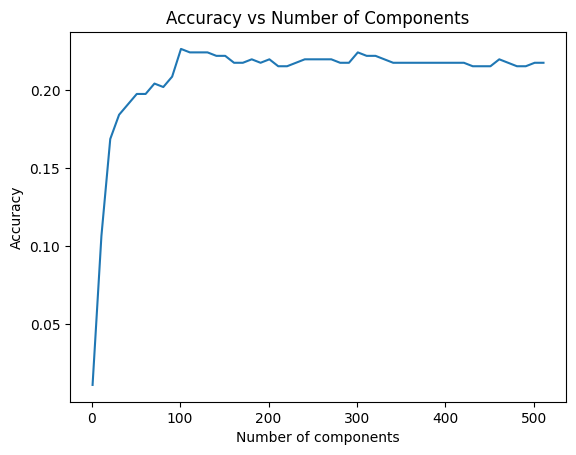

In [123]:
# split database into test and train using sklearn
X_train, X_test, y_train, y_test = train_test_split(vit_embed, ground_truth, test_size=0.3, shuffle=True)

#perform pca on X_train -> find its eigen vectors and project X_train on to the new subspace
X = X_train
X = X.T
print("X shape:",X.shape)

#mean centering
X_mean = np.mean(X,axis=1)
X_mean = X_mean.reshape(X_mean.shape[0],1)
X = X - X_mean
print("X shape after mean centering:",X.shape)

#covariance matrix
cov_mat = np.cov(X, rowvar= True)
print("Covariance matrix shape:",cov_mat.shape)

#eigen values and eigen vectors
eig_vals,eig_vecs = np.linalg.eig(cov_mat)

#sort eigen values in descending order
sorted_index = np.argsort(eig_vals)[::-1]

#sort eigen vectors according to eigen values
eig_vecs = eig_vecs[:,sorted_index]

min_num_components = min(X.shape[0], X.shape[1])

accuracy_list= []
no_of_principal_components = []

X_test_original = X_test
X_train_original = X_train

for num_components in range(1, min_num_components, 10):

    #select top num_components eigen vectors
    eig_vecs_cpy = eig_vecs[:,:num_components]

    # reconstruct the training data using num_components eigen vectors
    X = X_train_original.T
    X_mean = np.mean(X,axis=1)
    X_mean = X_mean.reshape(X_mean.shape[0],1)
    X = X - X_mean
    X_pca = np.dot(X.T,eig_vecs_cpy)

    # project X_test on to the new subspace

    X_test = X_test_original.T
    X_mean = np.mean(X_test,axis=1)
    X_mean = X_mean.reshape(X_mean.shape[0],1)
    X_test = X_test - X_mean
    X_test_pca = np.dot(X_test.T,eig_vecs_cpy)


    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X_pca, y_train)

    y_pred = neigh.predict(X_test_pca)

    # calculate accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)

    accuracy_list.append(accuracy)
    no_of_principal_components.append(num_components)

#plot
plt.plot(no_of_principal_components,accuracy_list)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Components')
plt.show()

Observations:
1. The accuracy is reduced after dimensionality reduction. But increases and saturates with increasing number of components

### The same with IIIT-CFW dataset

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


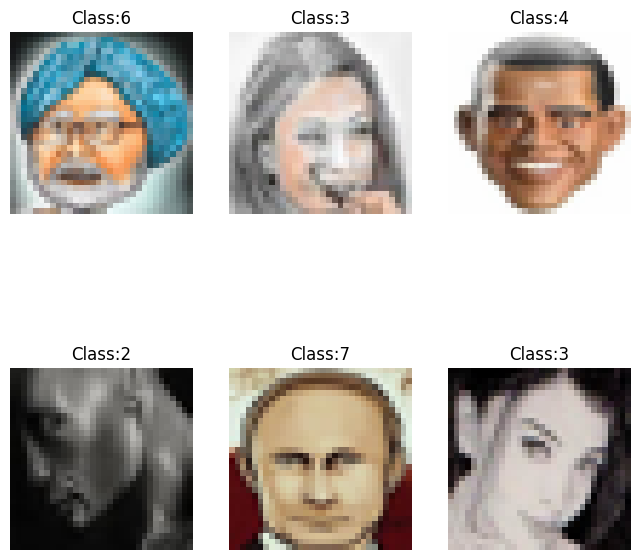

Accuracy before dimensionality reduction: 0.3415841584158416


In [124]:
# Before Dimensionality Reduction

# Load data again
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

X = X.reshape(N,H*W*C)


# split database into test and train using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

# calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)

print("Accuracy before dimensionality reduction:",accuracy)


X shape: (3072, 470)
X shape after mean centering: (3072, 470)


Covariance matrix shape: (3072, 3072)


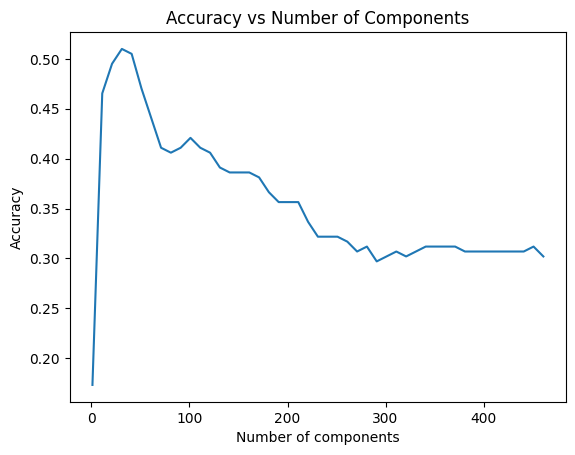

In [125]:
# split database into test and train using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

#perform pca on X_train -> find its eigen vectors and project X_train on to the new subspace
X_train = X_train.T
print("X shape:",X_train.shape)

#mean centering
X_mean = np.mean(X_train,axis=1)
X_mean = X_mean.reshape(X_mean.shape[0],1)
X_train = X_train - X_mean
print("X shape after mean centering:",X_train.shape)

#covariance matrix
cov_mat = np.cov(X_train, rowvar= True)
print("Covariance matrix shape:",cov_mat.shape)

#eigen values and eigen vectors
eig_vals,eig_vecs = np.linalg.eig(cov_mat)

# keep only the real eigenvectors
eig_vecs = np.real(eig_vecs)

#sort eigen values in descending order
sorted_index = np.argsort(eig_vals)[::-1]

#sort eigen vectors according to eigen values
eig_vecs = eig_vecs[:,sorted_index]

min_num_components = min(X_train.shape[0], X_train.shape[1])

accuracy_list= []
no_of_principal_components = []

X_test_original = X_test
X_train_original = X_train

for num_components in range(1, min_num_components, 10):

    #select top num_components eigen vectors
    eig_vecs_cpy = eig_vecs[:,:num_components]

    # reconstruct the training data using num_components eigen vectors
    X = X_train_original.T
    X_mean = np.mean(X,axis=1)
    X_mean = X_mean.reshape(X_mean.shape[0],1)
    X = X - X_mean
    # print("X shape after mean centering:",X.shape)
    X_pca = np.dot(X,eig_vecs_cpy)

    # project X_test on to the new subspace

    X_test = X_test_original.T
    X_mean = np.mean(X_test,axis=1)
    X_mean = X_mean.reshape(X_mean.shape[0],1)
    X_test = X_test - X_mean
    # print("X_test shape after mean centering:",X_test.shape)
    X_test_pca = np.dot(X_test.T,eig_vecs_cpy)


    neigh = KNeighborsClassifier(n_neighbors=5)
    # print("X_pca shape:",X_pca.shape)
    # print("y_train shape:",y_train.shape)
    neigh.fit(X_pca, y_train)

    y_pred = neigh.predict(X_test_pca)

    # calculate accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)

    accuracy_list.append(accuracy)
    no_of_principal_components.append(num_components)

#plot
plt.plot(no_of_principal_components,accuracy_list)
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Components')
plt.show()

## 1.2 Pictionary Dataset

This task is to perform the PCA on the Pictionary Dataset (Dataset).The at-
tachment also contains the description for the Dataset. Perform PCA for both
drawer and guesser.
1.  Plot the above features with respect to the obtained PCA axes.
2.  What does each of the new axes that are obtained from PCA represent ?

In [126]:
# load drawer data from csv to pandas dataframe
def load_drawer_data():
    drawer_data = pd.read_csv('smai_assignment_pictionary/drawer_attributes.csv')
    return drawer_data

# load guesser data
def load_guesser_data():
    guesser_data = pd.read_csv('smai_assignment_pictionary/guesser_attributes.csv')
    return guesser_data


In [127]:
drawer = load_drawer_data()
drawer.drop('d_drawer', axis=1, inplace=True)
drawer.head()

,d_area_median,d_stroke_freq_median,d_rangestroketime_median,d_firststroketime_median,d_laststroketime_median,d_pcgamestup,d_pcgamestdown,d_pcgameserasehighlight
0,0.000000,0.000000,0.000,0.000,0.000,0.00,0.0,0.000000
1,82306.749763,0.578802,21.660,3.512,26.815,0.00,0.0,0.777778
2,60929.328432,0.239168,25.087,1.368,26.455,1.00,1.0,1.000000
3,119037.637976,0.402533,54.162,2.459,56.621,0.75,0.5,1.000000
4,0.000000,0.000000,0.000,0.000,0.000,0.00,0.0,0.000000


In [128]:
guesser = load_guesser_data()
guesser.drop('g_guesser',inplace=True,axis=1)
guesser.head()

,g_noofmessage_median,g_firstmessagetime_median,g_lastmessagetime_median,g_rangemessagetime_median,g_pcgamesconfusion,g_entropy
0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,1.0,25.367172,39.041594,0.000000,0.0,0.000000
2,2.0,12.988740,51.351317,38.362577,1.0,0.693147
3,3.5,20.622346,64.718058,44.095712,0.0,1.242453
4,3.0,30.339558,78.943003,48.603445,0.0,1.098612


### Implementing PCA on both datasets

In [133]:
# DRAWER DATA

# perform pca on the data

# convert pandas dataframe to numpy array
X = drawer # (100,8)
X = np.array(X)
print("X shape:",X.shape)

# normalise the data
X = (X - np.mean(X,axis=0))/np.std(X,axis=0)

X = X.T # (8,100)
#mean centering
X_mean = np.mean(X,axis=1)
X_mean = X_mean.reshape(X_mean.shape[0],1)
X = X - X_mean
print("X shape after mean centering:",X.shape)

#covariance matrix
cov_mat = np.cov(X, rowvar= True)
print("Covariance matrix shape:",cov_mat.shape)

#eigen values and eigen vectors
eig_vals,eig_vecs = np.linalg.eig(cov_mat)

# sort them in descending order
sorted_index = np.argsort(eig_vals)[::-1]

#sort eigen vectors according to eigen values
eig_vecs = eig_vecs[:,sorted_index]
print("Eigen vectors shape:",eig_vecs.shape)

X shape: (100, 8)
X shape after mean centering: (8, 100)
Covariance matrix shape: (8, 8)
Eigen vectors shape: (8, 8)


Text(0, 0.5, 'Second Principal Component')

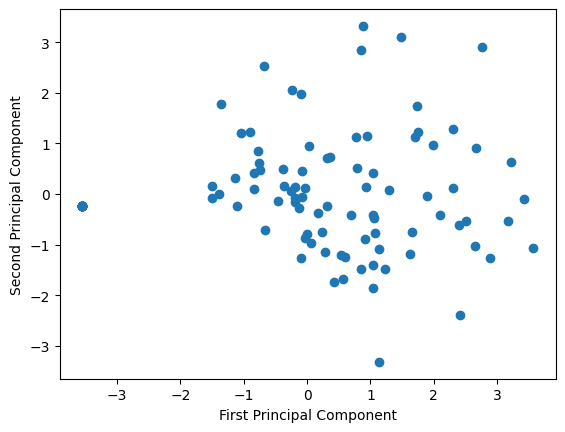

In [134]:
# plot the points on the first two principal components
X = X.T # (100,8)
X = np.dot(X,eig_vecs)
plt.scatter(X[:,0],X[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Text(0.5, 0, 'Third Principal Component')

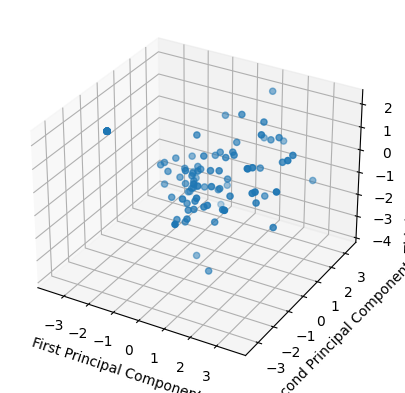

In [137]:
# plot the points on the first three principal components
# X = X.T
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2])
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')

#### Plot the percentage contribution of each feature in the 8 principal components
(What does each of the new axes that are obtained from PCA represent ?)

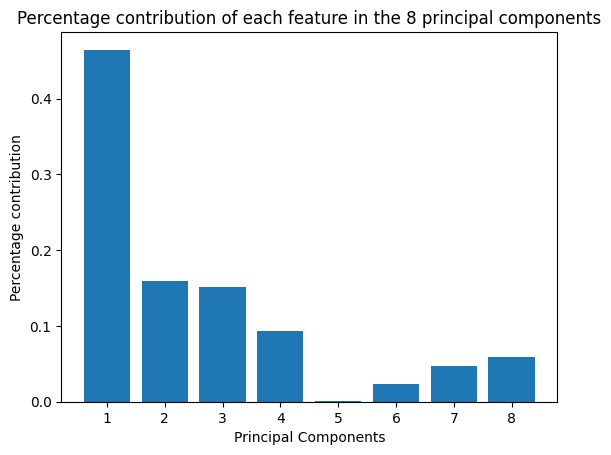

In [139]:
# Plot the percentage contribution of each feature in the 8 principal components
total = np.sum(eig_vals)
explained_variance = []
for i in range(len(eig_vals)):
    explained_variance.append(eig_vals[i]/total)

plt.bar(range(1,len(explained_variance)+1),explained_variance)
plt.xlabel('Principal Components')
plt.ylabel('Percentage contribution')
plt.title('Percentage contribution of each feature in the 8 principal components')
plt.show()

1. principal components are obtained in such a way that they capture the maximum variance in the data, and they are orthogonal to each other, meaning they are uncorrelated.
2. The principal components can be thought of as new coordinate axes in a transformed feature space. These axes are linear combinations of the original features, and they allow you to represent the data in a more compact and meaningful way. 